In [20]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.special import sph_harm
from matplotlib.colors import LightSource
import matplotlib
%matplotlib inline

In [21]:
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2*np.pi, 100)
theta, phi = np.meshgrid(theta, phi)

In [22]:
x = np.sin(theta)*np.cos(phi)
y = np.sin(theta)*np.sin(phi)
z = np.cos(theta)

In [23]:
def get_SphHarm(l, m, component):
    colours = getattr(sph_harm(m, l, phi, theta), component)
    cmax, cmin = colours.max(), colours.min()
    SphHarm = colours
    colours = (colours - cmin)/(cmax - cmin+1) #colour normalization
    ls = LightSource(180, 45) #Creates a light source coming from the specified azimuth and elevation
    rgb = ls.shade(colours, cmap = cm.seismic, vert_exag = 0.1, blend_mode = 'soft')
    return SphHarm,rgb

In [24]:
def main(l):
    for m in range(-l,l+1):
        print(l,m)
        fig = plt.figure(figsize = plt.figaspect(0.5)) #
        realvalues, realrgb = get_SphHarm(l, m, 'real')
        imagvalues, imagrgb = get_SphHarm(l, m, 'imag')
        realAx = fig.add_subplot(121, projection = '3d') #first argument specifies the relative position of the subplot
        imagAx = fig.add_subplot(122, projection = '3d')
        allaxs = [realAx, imagAx]
        for rgbi,axi,ri in zip([realrgb,imagrgb],allaxs,[realvalues, imagvalues]):
            ri = np.abs(np.squeeze(np.array(ri)))
            axi.plot_surface(np.multiply(ri,x), np.multiply(ri,y), np.multiply(ri,z),  rstride = 1, cstride = 1, facecolors = rgbi, shade = False)
        for eachAx in allaxs:
            eachAx.set_axis_off()
        plt.show()

1 -1


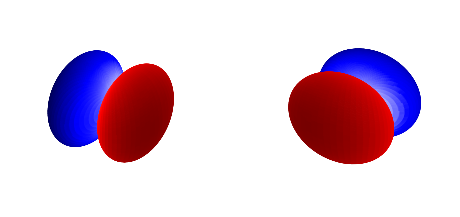

1 0


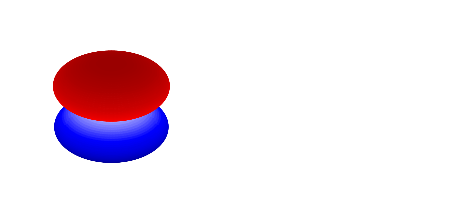

1 1


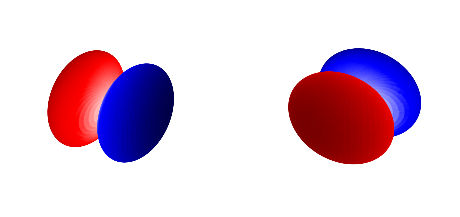

In [25]:
main(1)

2 -2


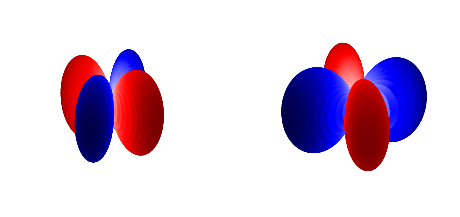

2 -1


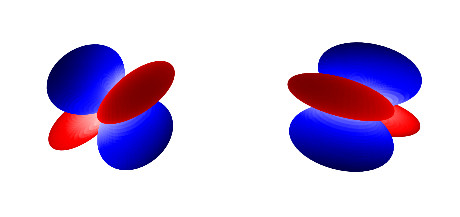

2 0


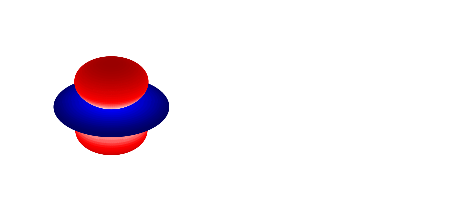

2 1


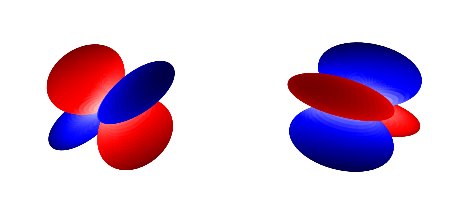

2 2


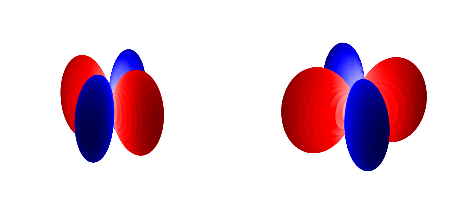

In [26]:
main(2)